<a href="https://colab.research.google.com/github/racheljhuh/HMI/blob/main/indassignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns # Import Seaborn
import matplotlib.pyplot as plt
! git clone https://www.github.com/racheljhuh/HMI
df = pd.read_csv('./HMI/sensorReadings-ia6-sys3023.csv',low_memory=False) #asked chat gpt for encoding
df.head()


fatal: destination path 'HMI' already exists and is not an empty directory.


,Time,AvePressure [N/sq cm],MaxPressure [N/sq cm],MinPressure [N/sq cm],Force [N],Contact Area [sq cm],Centroid X [cm],Centroid Y [cm],Centroid Z [cm]
0,566.925,-0.074,0.061,-0.287,0.05,1.8,1.1,2.4,0
1,566.959,-0.074,0.061,-0.287,0.05,1.8,1.2,2.4,0
2,566.993,-0.074,0.061,-0.287,0.05,1.8,1.2,2.4,0
3,567.027,-0.074,0.061,-0.288,0.05,1.8,1.2,2.4,0
4,567.061,-0.074,0.061,-0.288,0.05,1.8,1.2,2.4,0


<ipython-input-23-0814ae1d8c6b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['Time'] -= 566.925
<ipython-input-23-0814ae1d8c6b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['Time'] -= 710


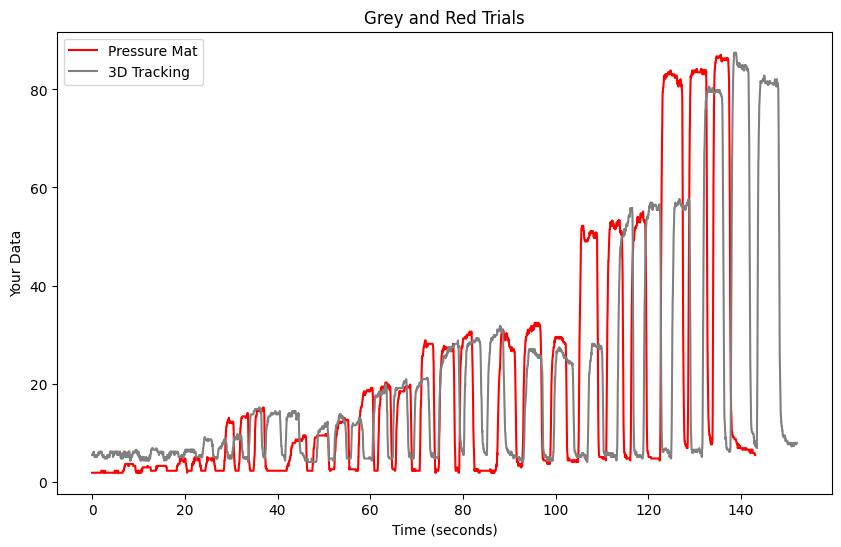

In [23]:
df.rename(columns={'Time ': 'Time'}, inplace=True)
df = df[df['Time'] < 862] #Clean the Shaking

gdf = df[df['Time'] >= 710]  # Select data from time 710 seconds onwards for grey trial
rdf = df[df['Time'] < 710]    # Select data before 710 seconds for red trial

# Subtract 566.925 from all time values in the grey trial
rdf['Time'] -= 566.925
# Subtract 710 from all time values in the grey trial
gdf['Time'] -= 710

#Plot the graphs on top of each other
plt.figure(figsize=(10, 6))
plt.plot(rdf['Time'], rdf['Contact Area [sq cm]'], color='red', label='Pressure Mat')

# Plot the grey trial data in grey
plt.plot(gdf['Time'], gdf['Contact Area [sq cm]'], color='grey', label='3D Tracking')

plt.xlabel('Time (seconds)')
plt.ylabel('Your Data')
plt.legend()
plt.title('Grey and Red Trials')
# Show the graph
plt.show()
